SENTIMENT ANALYSIS FROM INSTAGRAM

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("/content/archive (4).zip")
df.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [123]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [124]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Unnamed: 0,id,User id,Photo id,Hashtags used count
count,7488.000000,7488.000000,7488.000000,7488.000000,7488.000000
mean,3743.500000,3744.500000,48.949386,129.099225,2.416667
std,2161.743741,2161.743741,28.354045,73.776439,1.705905
min,0.000000,1.000000,2.000000,1.000000,0.000000
10%,748.700000,749.700000,11.700000,27.000000,1.000000
25%,1871.750000,1872.750000,24.000000,65.000000,1.000000
50%,3743.500000,3744.500000,48.000000,130.000000,2.000000
75%,5615.250000,5616.250000,72.000000,193.000000,3.250000
90%,6738.300000,6739.300000,91.000000,231.000000,5.000000
max,7487.000000,7488.000000,100.000000,257.000000,6.000000


In [125]:
df.columns

Index(['Unnamed: 0', 'id', 'comment', 'User  id', 'Photo id',
       'created Timestamp', 'posted date', 'emoji used',
       'Hashtags used count'],
      dtype='object')

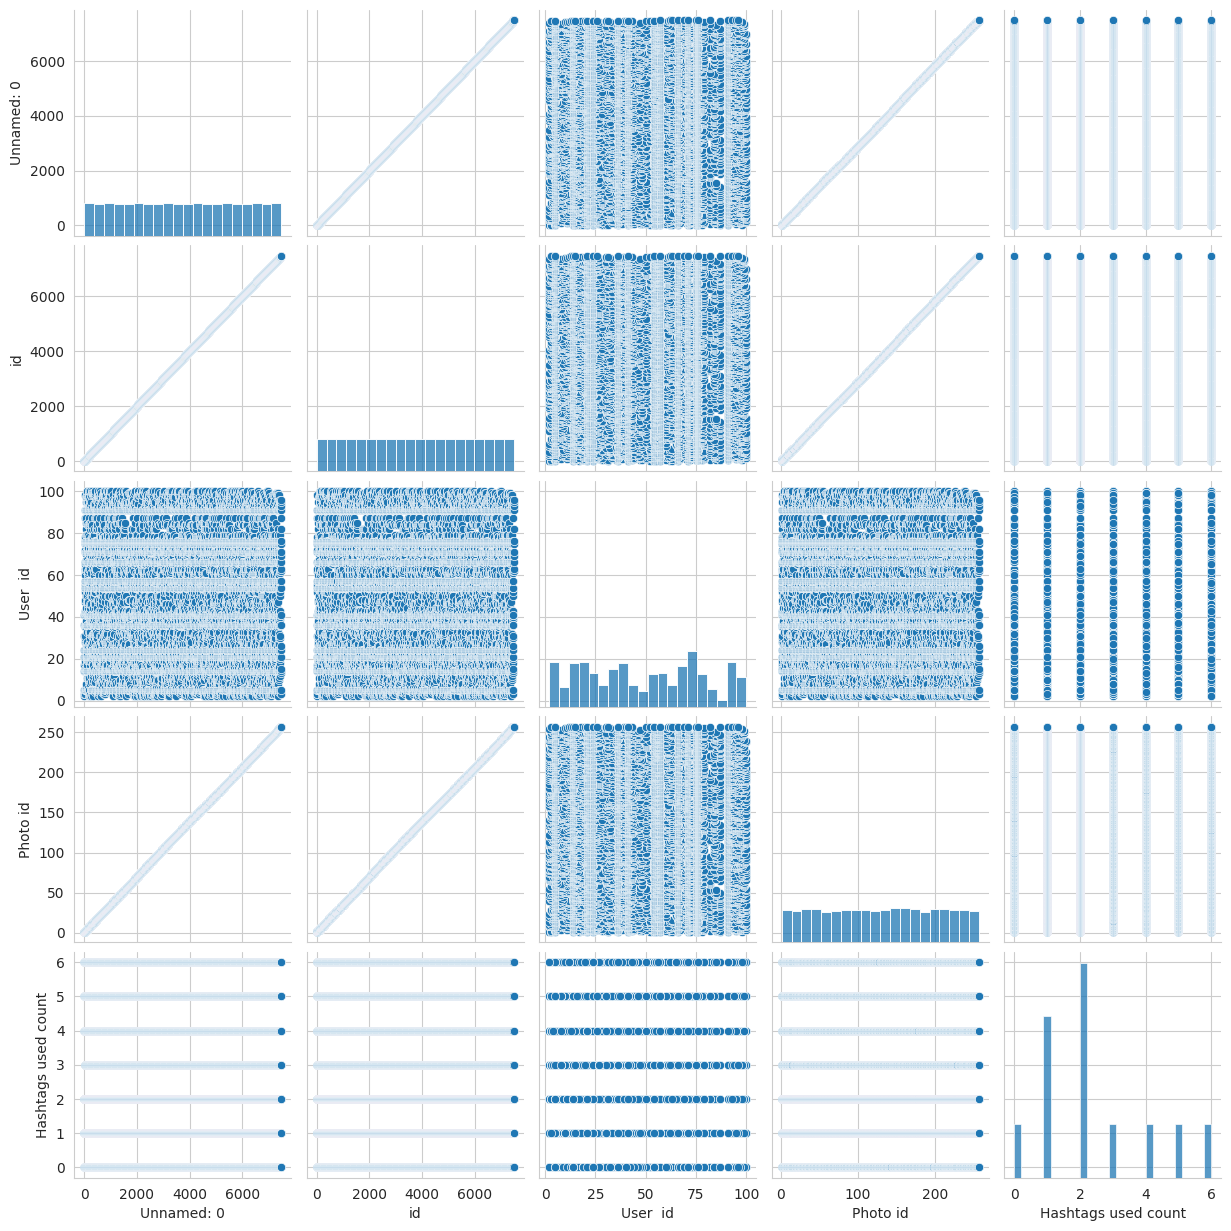

In [126]:
sns.pairplot(df)

In [132]:
import pandas as pd

# Define file path
file_path = os.path.join('/content/archive (4).zip')

# Load the data into a pandas DataFrame
df_comments = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_comments.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [133]:
num_comments = df_comments.shape[0]

# 2. Look at the distribution of comments per user and per photo
comments_per_user = df_comments['User  id'].value_counts()
comments_per_photo = df_comments['Photo id'].value_counts()

# 3. Examine the distribution of the `Hashtags used count` column
hashtags_dist = df_comments['Hashtags used count'].value_counts()

# 4. Check the frequency of emoji usage in comments
emoji_usage = df_comments['emoji used'].value_counts()

# 5. Check the date range of the comments
df_comments['created Timestamp'] = pd.to_datetime(df_comments['created Timestamp'])
date_range = df_comments['created Timestamp'].min(), df_comments['created Timestamp'].max()

num_comments, comments_per_user.describe(), comments_per_photo.describe(), hashtags_dist, emoji_usage, date_range

(7488,
 count     77.000000
 mean      97.246753
 std       72.734404
 min       49.000000
 25%       61.000000
 50%       67.000000
 75%       74.000000
 max      257.000000
 Name: count, dtype: float64,
 count    257.000000
 mean      29.136187
 std        3.452939
 min       21.000000
 25%       27.000000
 50%       29.000000
 75%       31.000000
 max       39.000000
 Name: count, dtype: float64,
 Hashtags used count
 2    2496
 1    1872
 4     624
 0     624
 5     624
 6     624
 3     624
 Name: count, dtype: int64,
 emoji used
 yes    3744
 no     3744
 Name: count, dtype: int64,
 (Timestamp('2023-04-13 08:04:00'), Timestamp('2023-04-13 08:04:00')))

In [135]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('/content/archive (4).zip') # Training set is already available
train.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [136]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [137]:
d=train.describe()
d


,Unnamed: 0,id,User id,Photo id,Hashtags used count
count,7488.000000,7488.000000,7488.000000,7488.000000,7488.000000
mean,3743.500000,3744.500000,48.949386,129.099225,2.416667
std,2161.743741,2161.743741,28.354045,73.776439,1.705905
min,0.000000,1.000000,2.000000,1.000000,0.000000
25%,1871.750000,1872.750000,24.000000,65.000000,1.000000
50%,3743.500000,3744.500000,48.000000,130.000000,2.000000
75%,5615.250000,5616.250000,72.000000,193.000000,3.250000
max,7487.000000,7488.000000,100.000000,257.000000,6.000000


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

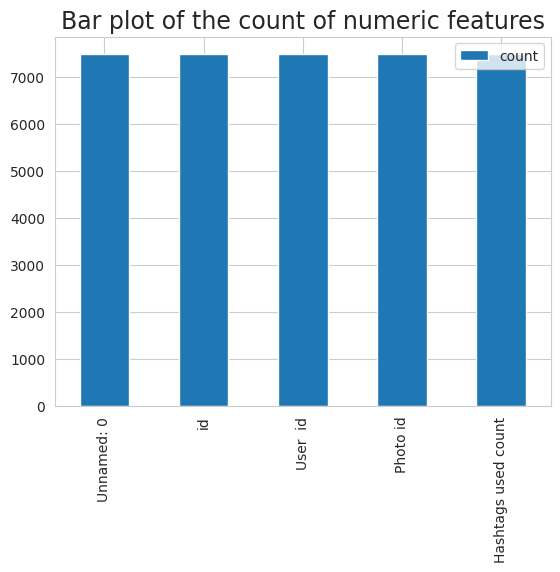

In [138]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [139]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/archive (4).zip",sep=',', index_col=0)
df.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7488 entries, 0 to 7487
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7488 non-null   int64 
 1   comment              7488 non-null   object
 2   User  id             7488 non-null   int64 
 3   Photo id             7488 non-null   int64 
 4   created Timestamp    7488 non-null   object
 5   posted date          7488 non-null   object
 6   emoji used           7488 non-null   object
 7   Hashtags used count  7488 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 784.5+ KB


In [142]:
df.describe()

,id,User id,Photo id,Hashtags used count
count,7488.000000,7488.000000,7488.000000,7488.000000
mean,3744.500000,48.949386,129.099225,2.416667
std,2161.743741,28.354045,73.776439,1.705905
min,1.000000,2.000000,1.000000,0.000000
25%,1872.750000,24.000000,65.000000,1.000000
50%,3744.500000,48.000000,130.000000,2.000000
75%,5616.250000,72.000000,193.000000,3.250000
max,7488.000000,100.000000,257.000000,6.000000


In [143]:
l=list(df.columns)
l[0:len(l)-2]

['id', 'comment', 'User  id', 'Photo id', 'created Timestamp', 'posted date']

In [144]:
df[['User  id','Hashtags used count']]

,User id,Hashtags used count
0,2,1
1,3,2
2,5,4
3,14,2
4,17,1
...,...,...
7483,82,5
7484,91,6
7485,93,2
7486,95,1


In [145]:
len(df['User  id'].unique())

77

In [146]:
df.values

array([[1, 'unde at dolorem', 2, ..., 'April 14', 'yes', 1],
       [2, 'quae ea ducimus', 3, ..., 'April 14', 'no', 2],
       [3, 'alias a voluptatum', 5, ..., 'April 14', 'no', 4],
       ...,
       [7486, 'sed quidem vitae', 93, ..., 'April 14', 'yes', 2],
       [7487, 'dolorem eveniet rerum', 95, ..., 'April 14', 'yes', 1],
       [7488, 'dolores nihil voluptas', 96, ..., 'April 14', 'no', 3]],
      dtype=object)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [4]:
insta = make_regression()

In [9]:
df = pd.read_csv('/content/aiml dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [10]:
df = pd.read_csv('/content/aiml dataset.csv')
description = df.describe()
print(description)


        Unnamed: 0           id     User  id     Photo id  Hashtags used count
count  7488.000000  7488.000000  7488.000000  7488.000000          7488.000000
mean   3743.500000  3744.500000    48.949386   129.099225             2.416667
std    2161.743741  2161.743741    28.354045    73.776439             1.705905
min       0.000000     1.000000     2.000000     1.000000             0.000000
25%    1871.750000  1872.750000    24.000000    65.000000             1.000000
50%    3743.500000  3744.500000    48.000000   130.000000             2.000000
75%    5615.250000  5616.250000    72.000000   193.000000             3.250000
max    7487.000000  7488.000000   100.000000   257.000000             6.000000


In [12]:
np.sum(pd.isnull(df).sum())

0

In [27]:
df[['User  id','Hashtags used count']]

,User id,Hashtags used count
0,2,1
1,3,2
2,5,4
3,14,2
4,17,1
...,...,...
7483,82,5
7484,91,6
7485,93,2
7486,95,1


In [15]:
df = pd.read_csv('/content/aiml dataset.csv')
df.head()


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [28]:
df.values

array([[0, 1, 'unde at dolorem', ..., 'Apr-14', 'yes', 1],
       [1, 2, 'quae ea ducimus', ..., 'Apr-14', 'no', 2],
       [2, 3, 'alias a voluptatum', ..., 'Apr-14', 'no', 4],
       ...,
       [7485, 7486, 'sed quidem vitae', ..., 'Apr-14', 'yes', 2],
       [7486, 7487, 'dolorem eveniet rerum', ..., 'Apr-14', 'yes', 1],
       [7487, 7488, 'dolores nihil voluptas', ..., 'Apr-14', 'no', 3]],
      dtype=object)

In [19]:
df = pd.read_csv('/content/aiml dataset.csv')
plt.show()


In [41]:
df.sort_values(by="id", ascending=False)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
7487,7487,7488,dolores nihil voluptas,96,257,13-04-2023 08:04,Apr-14,no,3
7486,7486,7487,dolorem eveniet rerum,95,257,13-04-2023 08:04,Apr-14,yes,1
7485,7485,7486,sed quidem vitae,93,257,13-04-2023 08:04,Apr-14,yes,2
7484,7484,7485,sit nulla qui,91,257,13-04-2023 08:04,Apr-14,no,6
7483,7483,7484,accusamus vel est,82,257,13-04-2023 08:04,Apr-14,no,5
...,...,...,...,...,...,...,...,...,...
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2


In [42]:
df.head(5)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [43]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.svm import SVC

In [50]:
model = SVC()

In [58]:
ins=pd.read_csv("/content/aiml dataset.csv")
ins.head(5)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [59]:
columns_to_drop = ["Unnamed: 0", "id"]
ins.drop(columns=columns_to_drop, inplace=True)

In [60]:
ins.isnull().sum()

comment                0
User  id               0
Photo id               0
created Timestamp      0
posted date            0
emoji used             0
Hashtags used count    0
dtype: int64

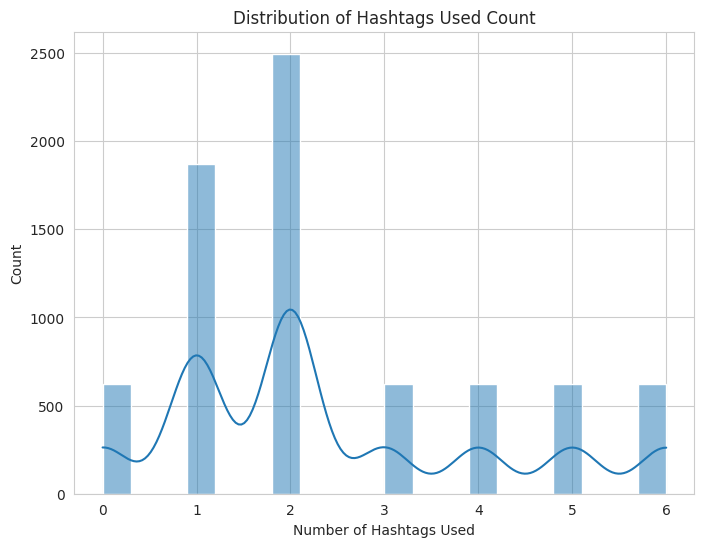

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(ins['Hashtags used count'], bins=20, kde=True)
plt.title('Distribution of Hashtags Used Count')
plt.xlabel('Number of Hashtags Used')
plt.ylabel('Count')
plt.show()

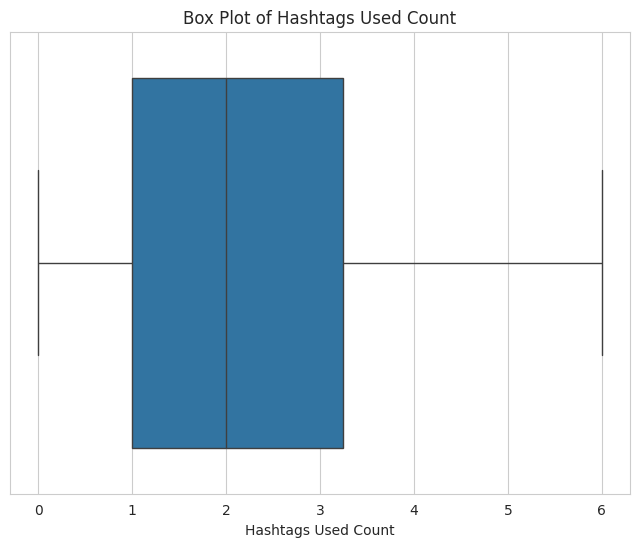

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ins['Hashtags used count'])
plt.title('Box Plot of Hashtags Used Count')
plt.xlabel('Hashtags Used Count')
plt.show()

<ipython-input-63-4ab749c844f2>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ins['created Timestamp'] = pd.to_datetime(ins['created Timestamp'])


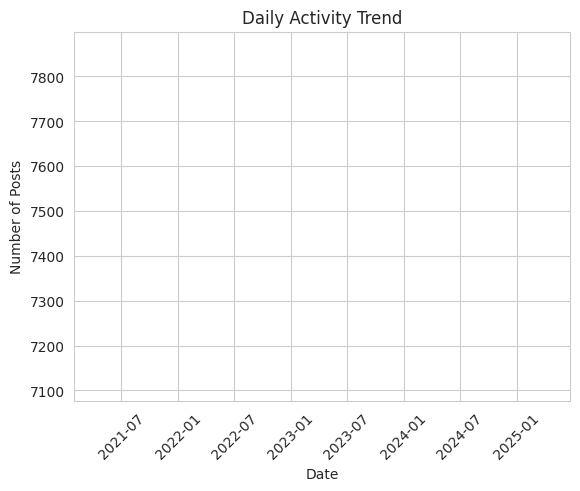

In [63]:
ins['created Timestamp'] = pd.to_datetime(ins['created Timestamp'])

# Extract date and time components
ins['date'] = ins['created Timestamp'].dt.date
ins['time'] = ins['created Timestamp'].dt.time

# Daily activity trend
daily_activity = ins['date'].value_counts().sort_index()
plt.plot(daily_activity.index, daily_activity.values)
plt.title('Daily Activity Trend')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import pandas as pd
df = pd.read_csv('/content/aiml dataset.csv')
df.head()


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [68]:
import pandas as pd
df = pd.read_csv('/content/aiml dataset.csv')
data_type = type(df)
print(data_type)


<class 'pandas.core.frame.DataFrame'>


In [69]:
import pandas as pd

# Load the dataset from the specified CSV file
df = pd.read_csv('/content/aiml dataset.csv')

# Get a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [71]:
ins.head()

,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count,date,time
0,unde at dolorem,2,1,2023-04-13 08:04:00,Apr-14,yes,1,2023-04-13,08:04:00
1,quae ea ducimus,3,1,2023-04-13 08:04:00,Apr-14,no,2,2023-04-13,08:04:00
2,alias a voluptatum,5,1,2023-04-13 08:04:00,Apr-14,no,4,2023-04-13,08:04:00
3,facere suscipit sunt,14,1,2023-04-13 08:04:00,Apr-14,yes,2,2023-04-13,08:04:00
4,totam eligendi quaerat,17,1,2023-04-13 08:04:00,Apr-14,yes,1,2023-04-13,08:04:00


In [73]:
ins.describe()

,User id,Photo id,created Timestamp,Hashtags used count
count,7488.000000,7488.000000,7488,7488.000000
mean,48.949386,129.099225,2023-04-13 08:04:00,2.416667
min,2.000000,1.000000,2023-04-13 08:04:00,0.000000
25%,24.000000,65.000000,2023-04-13 08:04:00,1.000000
50%,48.000000,130.000000,2023-04-13 08:04:00,2.000000
75%,72.000000,193.000000,2023-04-13 08:04:00,3.250000
max,100.000000,257.000000,2023-04-13 08:04:00,6.000000
std,28.354045,73.776439,NaN,1.705905


In [74]:
ins.isnull().sum()

comment                0
User  id               0
Photo id               0
created Timestamp      0
posted date            0
emoji used             0
Hashtags used count    0
date                   0
time                   0
dtype: int64

In [81]:
df.values

array([[0, 1, 'unde at dolorem', ..., 'Apr-14', 'yes', 1],
       [1, 2, 'quae ea ducimus', ..., 'Apr-14', 'no', 2],
       [2, 3, 'alias a voluptatum', ..., 'Apr-14', 'no', 4],
       ...,
       [7485, 7486, 'sed quidem vitae', ..., 'Apr-14', 'yes', 2],
       [7486, 7487, 'dolorem eveniet rerum', ..., 'Apr-14', 'yes', 1],
       [7487, 7488, 'dolores nihil voluptas', ..., 'Apr-14', 'no', 3]],
      dtype=object)

In [83]:
import pandas as pd

# Load the dataset from the specified CSV file
df = pd.read_csv('/content/aiml dataset.csv')

# Columns you want to drop
columns_to_drop = ["Unnamed: 0", "id"]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm the columns are dropped
df.head()


,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [88]:
ins.values

array([['unde at dolorem', 2, 1, ..., 1, datetime.date(2023, 4, 13),
        datetime.time(8, 4)],
       ['quae ea ducimus', 3, 1, ..., 2, datetime.date(2023, 4, 13),
        datetime.time(8, 4)],
       ['alias a voluptatum', 5, 1, ..., 4, datetime.date(2023, 4, 13),
        datetime.time(8, 4)],
       ...,
       ['sed quidem vitae', 93, 257, ..., 2, datetime.date(2023, 4, 13),
        datetime.time(8, 4)],
       ['dolorem eveniet rerum', 95, 257, ..., 1,
        datetime.date(2023, 4, 13), datetime.time(8, 4)],
       ['dolores nihil voluptas', 96, 257, ..., 3,
        datetime.date(2023, 4, 13), datetime.time(8, 4)]], dtype=object)

In [89]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize the DecisionTreeClassifier and fit it to the data
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

# Export the text representation of the decision tree
text_representation = tree.export_text(tree_clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [91]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [98]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and return accuracy
    """
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [99]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [102]:
df.shape

(7488, 9)

In [104]:
df.sort_values(by="id", ascending=False)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
7487,7487,7488,dolores nihil voluptas,96,257,13-04-2023 08:04,Apr-14,no,3
7486,7486,7487,dolorem eveniet rerum,95,257,13-04-2023 08:04,Apr-14,yes,1
7485,7485,7486,sed quidem vitae,93,257,13-04-2023 08:04,Apr-14,yes,2
7484,7484,7485,sit nulla qui,91,257,13-04-2023 08:04,Apr-14,no,6
7483,7483,7484,accusamus vel est,82,257,13-04-2023 08:04,Apr-14,no,5
...,...,...,...,...,...,...,...,...,...
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2


In [105]:
ins.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
User id,7488.0,48.949386,2.0,24.0,48.0,72.0,100.0,28.354045
Photo id,7488.0,129.099225,1.0,65.0,130.0,193.0,257.0,73.776439
created Timestamp,7488,2023-04-13 08:04:00,2023-04-13 08:04:00,2023-04-13 08:04:00,2023-04-13 08:04:00,2023-04-13 08:04:00,2023-04-13 08:04:00,NaN
Hashtags used count,7488.0,2.416667,0.0,1.0,2.0,3.25,6.0,1.705905


In [103]:
ins.shape

(7488, 9)

In [100]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

In [96]:
def accuracy(test_data, model, test_labels):
    predictions = model.predict(test_data)
    correct_predictions = sum(predictions == test_labels)
    accuracy = correct_predictions / len(test_labels)
    return accuracy




In [97]:
ins.columns

Index(['comment', 'User  id', 'Photo id', 'created Timestamp', 'posted date',
       'emoji used', 'Hashtags used count', 'date', 'time'],
      dtype='object')

In [115]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

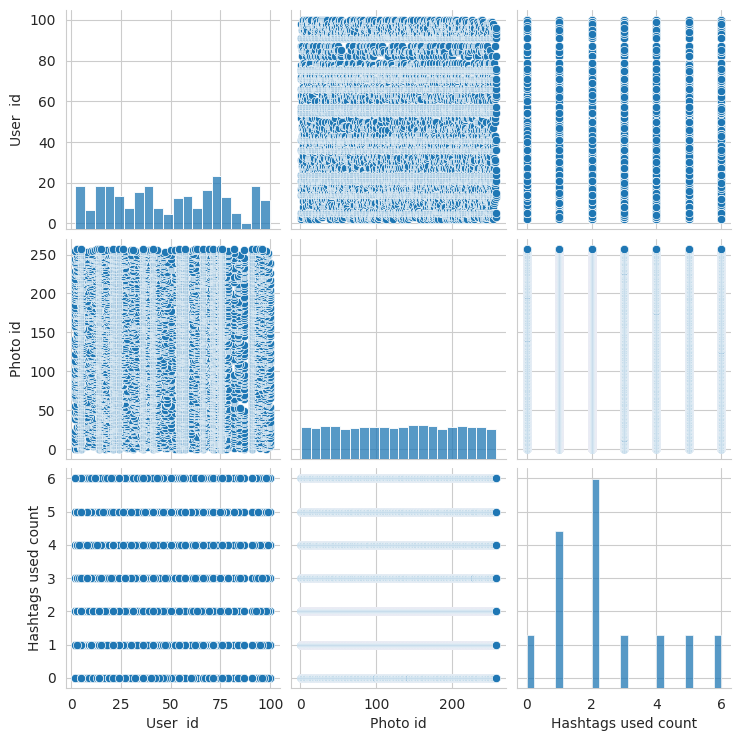

In [119]:
sns.pairplot(ins)

In [148]:
import nbconvert #recode the dataset

#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('/content/aiml dataset.csv') # Training set is already available
train.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [149]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

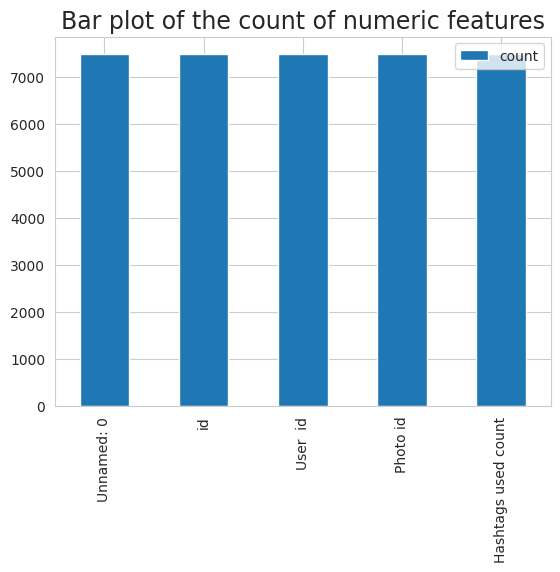

In [165]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

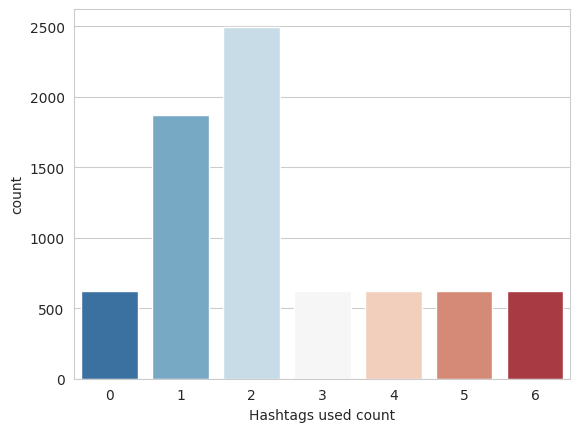

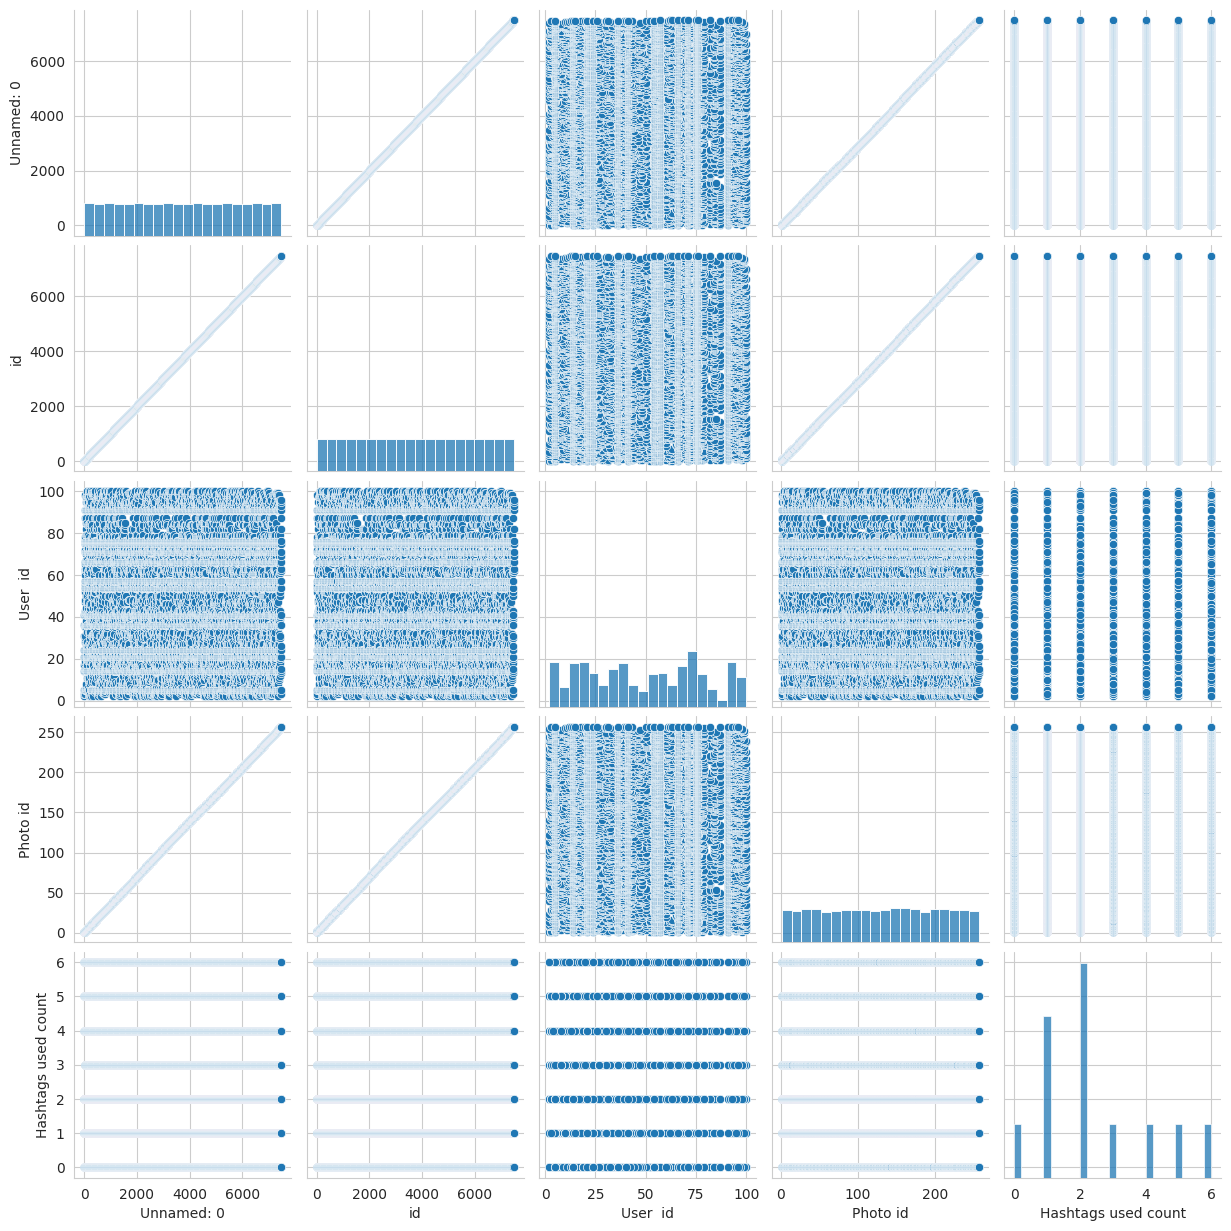

In [150]:
sns.set_style('whitegrid')
sns.countplot(x='Hashtags used count',data=train,palette='RdBu_r')
sns.pairplot(train)


<Axes: xlabel='emoji used', ylabel='count'>

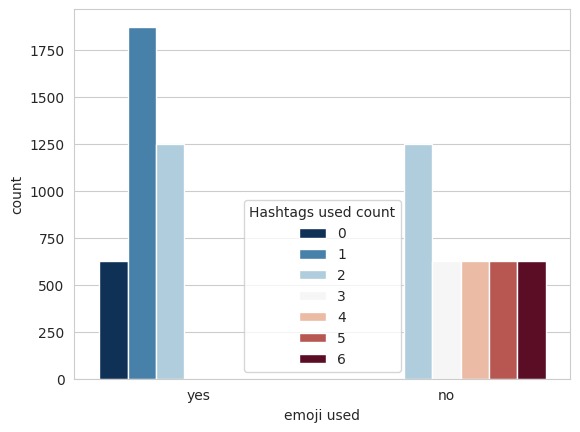

In [151]:
sns.set_style('whitegrid')
sns.countplot(x='emoji used',hue='Hashtags used count',data=train,palette='RdBu_r')

<Axes: xlabel='Hashtags used count', ylabel='count'>

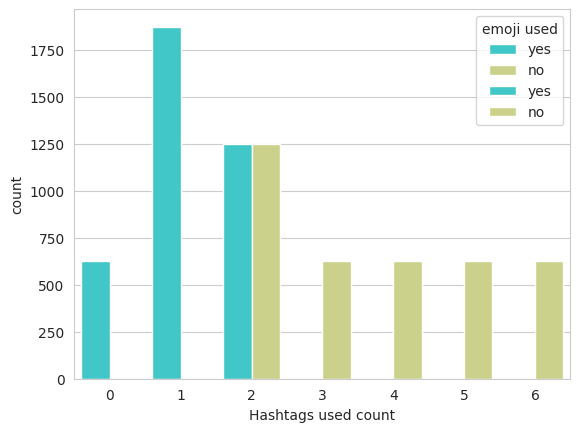

In [152]:
sns.set_style('whitegrid')
sns. countplot(x='Hashtags used count', hue ='emoji used', data= train, palette ='rainbow')
sns.countplot(x= 'Hashtags used count' ,hue= 'emoji used' ,data=train,palette= 'rainbow' )

Text(0.5, 1.0, 'Fraction of users used hashtags by class')

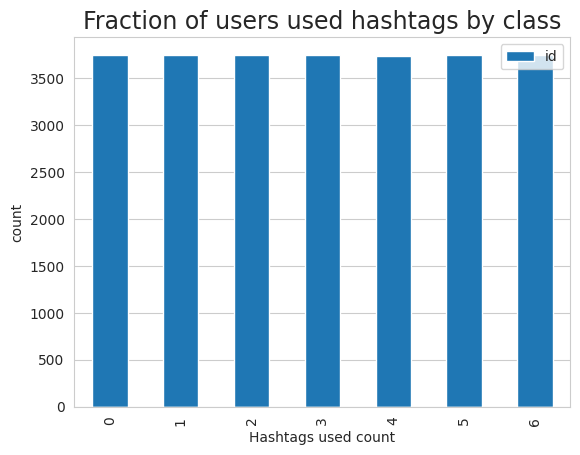

In [153]:
f_class_id=train.groupby('Hashtags used count')['id'].mean()
f_class_id = pd.DataFrame(f_class_id)
f_class_id
f_class_id.plot.bar(y='id')
sns.countplot(x='id',data=f_class_id,palette='rainbow')
plt.title("Fraction of users used hashtags by class",fontsize=17)

<Axes: xlabel='User  id', ylabel='count'>

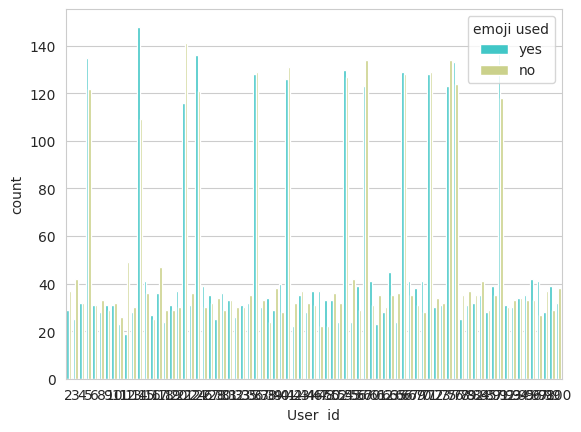

In [154]:
sns.set_style('whitegrid')
sns.countplot(x='User  id',hue='emoji used',data=train,palette='rainbow')

<Axes: title={'center': 'Hashtags used count histogram of the users'}, xlabel='Hashtags used count of the users', ylabel='Count'>

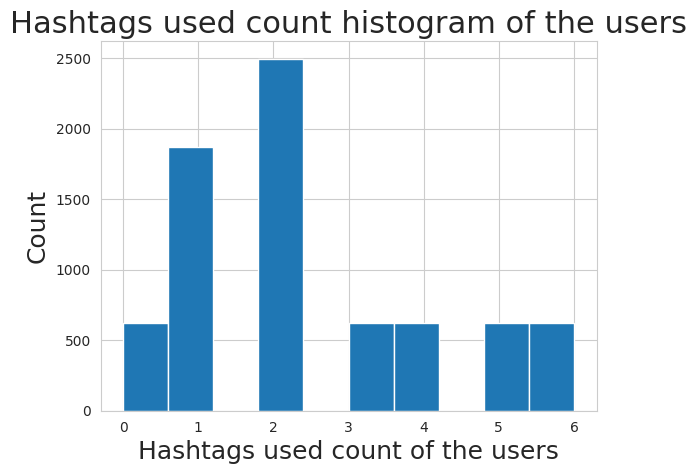

In [155]:
plt.xlabel("Hashtags used count of the users",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Hashtags used count histogram of the users",fontsize=22)
#train['Hashtags used count'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))
train['Hashtags used count'].hist()

<Axes: xlabel='emoji used', ylabel='Hashtags used count'>

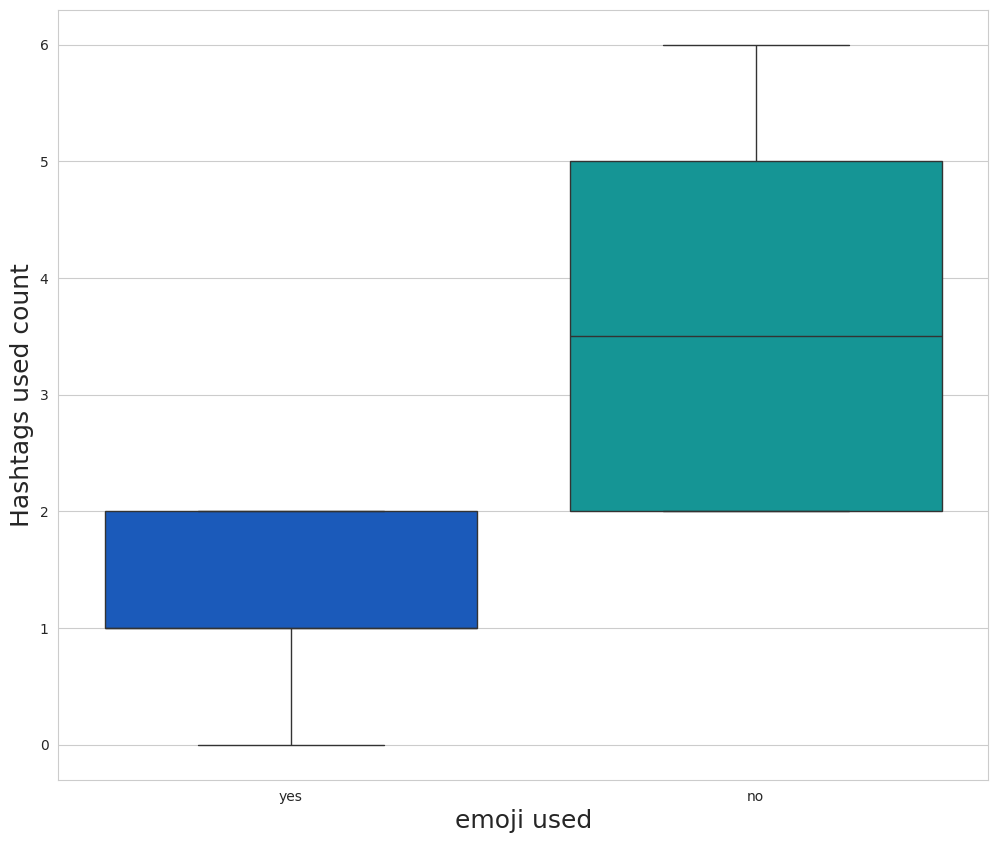

In [156]:
plt.figure(figsize=(12, 10))
plt.xlabel("emoji used",fontsize=18)
plt.ylabel("Hashtags used count",fontsize=18)
sns.boxplot(x='emoji used',y='Hashtags used count',data=train,palette='winter')

Text(0.5, 0, 'Hashtags used count')

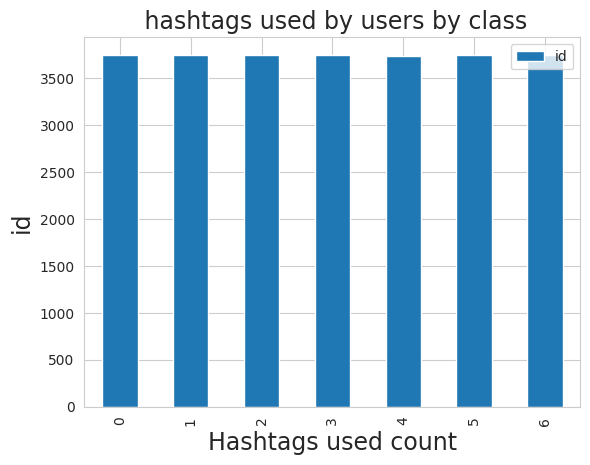

In [157]:
f_class_id=train.groupby('Hashtags used count')['id'].mean()
f_class_id = pd.DataFrame(f_class_id)
f_class_id.plot.bar(y='id')
plt.title(" hashtags used by users by class",fontsize=17)
plt.ylabel("id", fontsize=17)
plt.xlabel("Hashtags used count", fontsize=17)

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

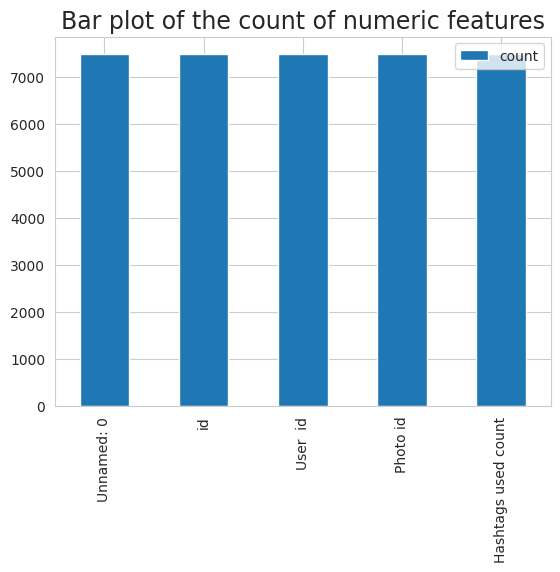

In [158]:
a=list(f_class_id['id'])
def impute_id(cols):
     id = cols[0]
     comment = cols[1]
     if pd.isnull(id):
        if comment == 1:
           return a[0]
        elif comment == 2:
           return a[1]
        else:
           return a[2]
     else:
         return id
train['id'] = train[['id','comment']].apply(impute_id,axis=1)
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [159]:
train.drop('id',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,Unnamed: 0,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


In [160]:
import pandas as pd


train = pd.DataFrame({
    'PassengerId': range(1, 6),
        'Pclass': [3, 1, 3, 1, 2],
            'Name': ['Braund, Mr. Owen Harris',
                         'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                                      'Heikkinen, Miss. Laina',
                                                   'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                                                                'Allen, Mr. William Henry'],
                                                                    'Sex': ['male', 'female', 'female', 'female', 'male'],
                                                                        'Age': [22, 38, 26, 35, 35],
                                                                            'Embarked': ['S', 'C', 'S', 'S', 'S']
                                                                            })


sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)


train.drop(['Sex', 'Embarked'], axis=1, inplace=True)


train = pd.concat([train, sex, embark], axis=1)

print(train.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       2                           Allen, Mr. William Henry   

   Age   male      S  
0   22   True   True  
1   38  False  False  
2   26  False   True  
3   35  False   True  
4   35   True   True  


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
df = pd.read_csv('/content/aiml dataset.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [164]:
df.describe()

,Unnamed: 0,id,User id,Photo id,Hashtags used count
count,7488.000000,7488.000000,7488.000000,7488.000000,7488.000000
mean,3743.500000,3744.500000,48.949386,129.099225,2.416667
std,2161.743741,2161.743741,28.354045,73.776439,1.705905
min,0.000000,1.000000,2.000000,1.000000,0.000000
25%,1871.750000,1872.750000,24.000000,65.000000,1.000000
50%,3743.500000,3744.500000,48.000000,130.000000,2.000000
75%,5615.250000,5616.250000,72.000000,193.000000,3.250000
max,7487.000000,7488.000000,100.000000,257.000000,6.000000


In [166]:
df.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,Apr-14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,Apr-14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,Apr-14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,Apr-14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,Apr-14,yes,1


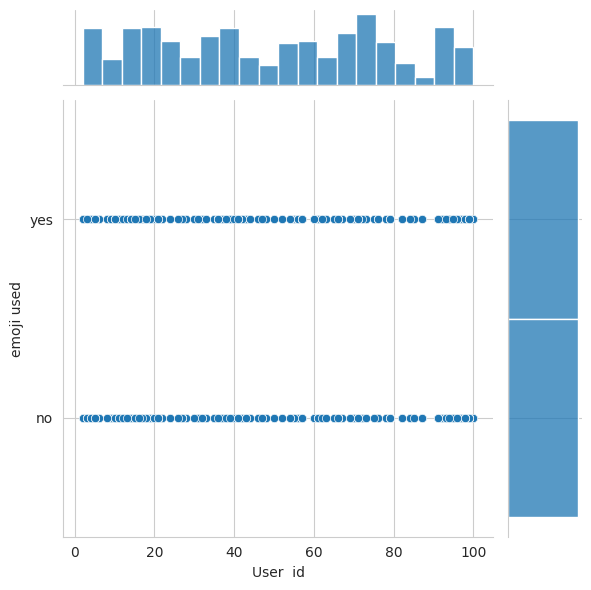

In [167]:
sns.jointplot(x='User  id',y='emoji used',data=df)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df['text'] contains the text data you want to analyze

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the text data
X = tfidf.fit_transform(df['emoji used'])

# Convert the transformed data into a DataFrame
df_final = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

In [169]:
df_final.head()

,no,yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


train test split

In [170]:
from sklearn.model_selection import train_test_split

# Assuming df['sentiment'] contains the sentiment labels for each Instagram post

X = df_final  # Features
y = df['emoji used']  # Sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

training a decision tree model

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [173]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Predictions and Evaluation of Decision Tree

In [174]:
predictions = dtree.predict(X_test)

In [175]:
from sklearn.metrics import classification_report,confusion_matrix

In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1146
         yes       1.00      1.00      1.00      1101

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247



In [177]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1146    0]
 [   0 1101]]
Accuracy of prediction: 1.0


Training the Random Forest Model


In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

Predictions and Evaluation

In [179]:
rfc_pred = rfc.predict(X_test)
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1146
         yes       1.00      1.00      1.00      1101

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247



In [180]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[1146    0]
 [   0 1101]]


In [181]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

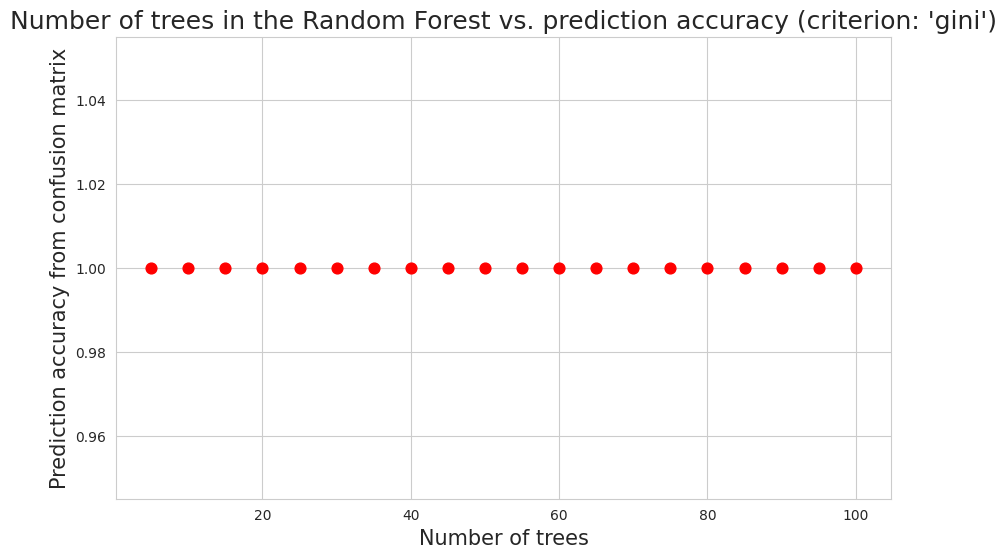

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [183]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

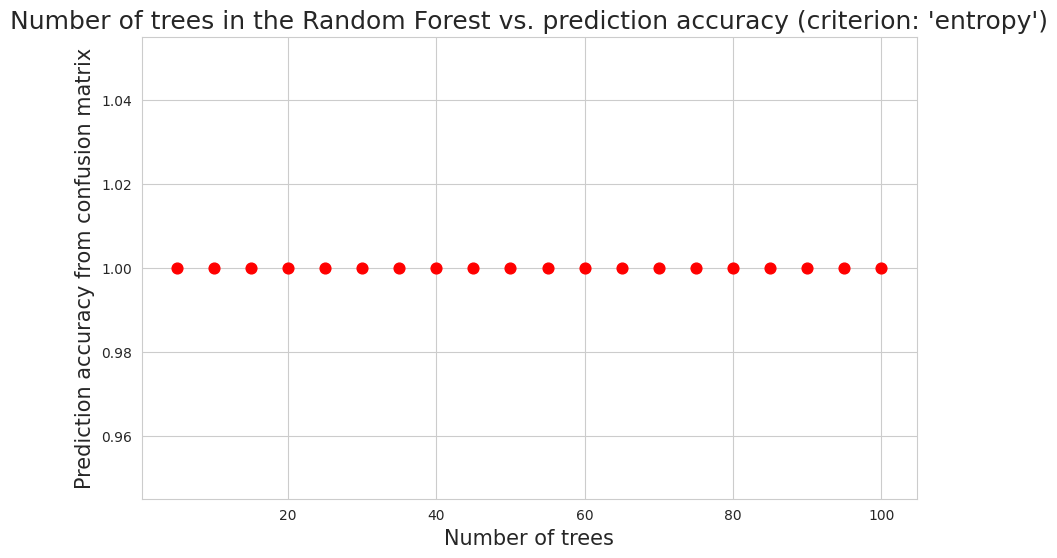

In [184]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [185]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

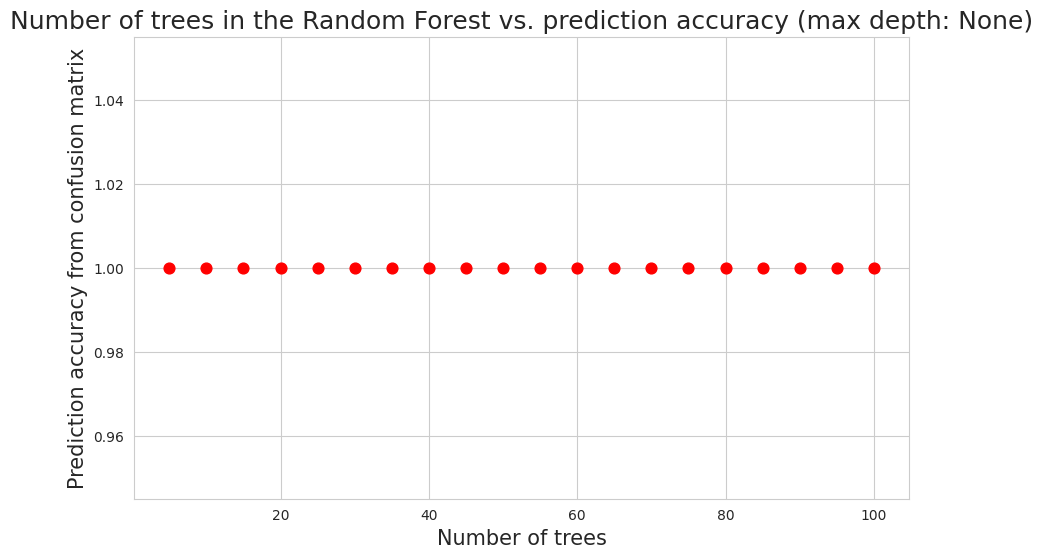

In [186]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [187]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

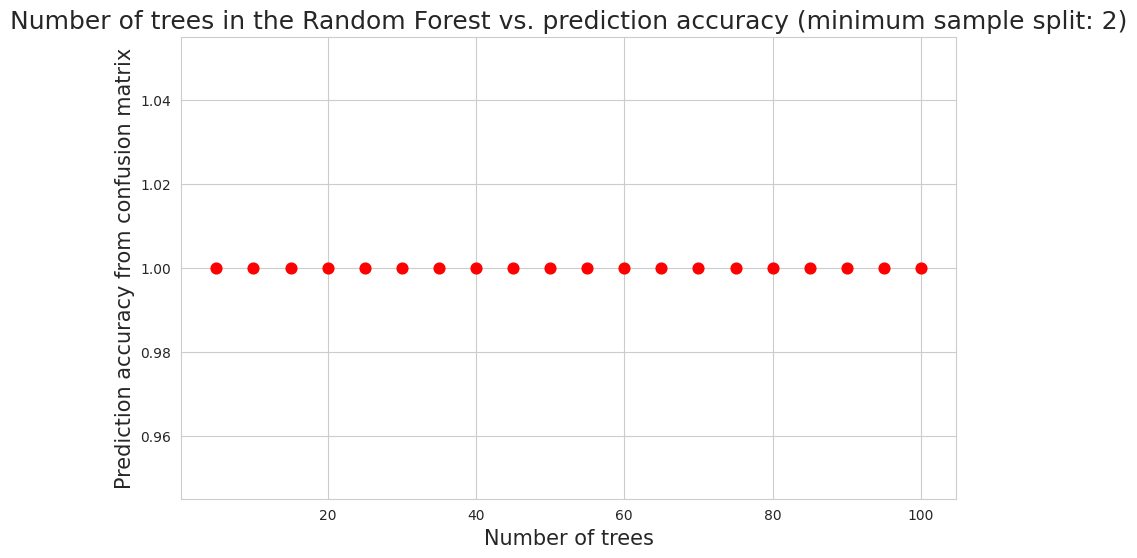

In [188]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

IMPLEMENT K-MEANS CLUSTERING USING SYNTHETIC DATA FROM BLOBS

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df['text'] contains the text data you want to analyze

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the text data
X = tfidf.fit_transform(df['emoji used'])

# Implement K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Print the top terms per cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()
for i in range(3):
    print("Cluster %d:" % i, end='')
for ind in order_centroids[i, :10]:
                print(' %s' % terms[ind], end='')
print()

Top terms per cluster:
Cluster 0:Cluster 1:Cluster 2: no yes


Import K-Means from Sklearn and Fit the data

In [190]:
from sklearn.cluster import KMeans

# Assuming X contains the TF-IDF transformed data and y contains the sentiment labels

# Implement K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

Visualize the fitted data by coloring the blobs by assigned label numbers

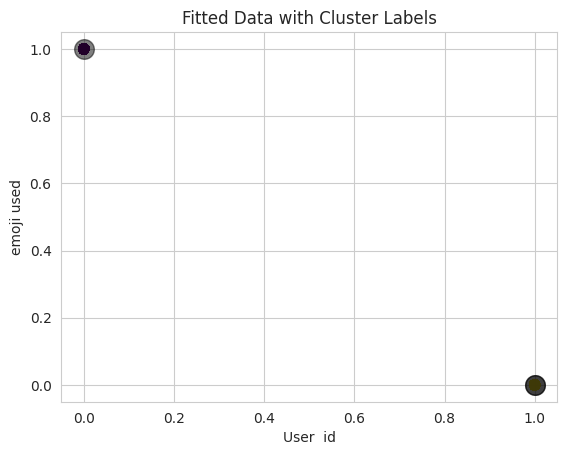

In [191]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reduce the dimensionality of the TF-IDF transformed data for visualization
lsa = TruncatedSVD(n_components=2)
X_reduced = lsa.fit_transform(X)

# Visualize the fitted data with colored blobs representing cluster labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.5)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fitted Data with Cluster Labels')
plt.xlabel('User  id')
plt.ylabel('emoji used')
plt.show()